<a href="https://colab.research.google.com/github/Ayushi1429/-Agile-Sprint-Analysis-Velocity-Team-Performance/blob/main/Agile_Sprint_Analysis_Velocity_%26_Team_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Upload the files**

In [19]:
from google.colab import files
uploaded = files.upload()


**Step 2: Load the Data**

In [20]:
import pandas as pd

# Load all 3 datasets
issues = pd.read_csv('Spring XD Issues 1992.csv')
summary = pd.read_csv('Spring XD Issues Summary 2861.csv')
sprints = pd.read_csv('Spring XD Sprints 67.csv')

# View basic info
print("Issues:", issues.shape)
print("Summary:", summary.shape)
print("Sprints:", sprints.shape)

issues.head()


Issues: (1992, 22)
Summary: (2861, 10)
Sprints: (66, 22)


,key,issueType,sprint,status,summary,description,storyPoint,priority,watchcount,fixVersions,...,creator,reporter,commentCount,votes,issueLinks,blockedBy,blocks,dependedOnBy,dependedOn,subtasks
0,XD-6,Story,1,Done,Channel Registry,NaN,3.0,4.0,2.0,1.0,...,Mark Pollack,Mark Pollack,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
1,XD-32,Technical task,1,Done,Create base Channel Registry abstraction,Define the ChannelRegistry interface.,0.0,3.0,3.0,1.0,...,Mark Fisher,Mark Fisher,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,XD-33,Technical task,1,Done,Implement LocalChannelRegistry,This should be usable within a single JVM proc...,0.0,4.0,2.0,1.0,...,Mark Fisher,Mark Fisher,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,XD-7,Story,1,Done,Tuple data structure,The tuple data structure should be backward co...,1.0,4.0,1.0,1.0,...,Mark Pollack,Mark Pollack,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,XD-20,Story,1,Done,DIRT Runtime that deploys an application conte...,NaN,3.0,3.0,1.0,1.0,...,Mark Pollack,Mark Pollack,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [21]:
issues.columns, summary.columns, sprints.columns


(Index(['key', 'issueType', 'sprint', 'status', 'summary', 'description',
        'storyPoint', 'priority', 'watchcount', 'fixVersions',
        'affectedVersions', 'assignee', 'creator', 'reporter', 'commentCount',
        'votes', 'issueLinks', 'blockedBy', 'blocks', 'dependedOnBy',
        'dependedOn', 'subtasks'],
       dtype='object'),
 Index(['projectID', 'sprintId', 'status', 'storyId', 'issueKey', 'summary',
        'priorityId', 'assignee', 'initialStoryPoint', 'currentStoryPoint'],
       dtype='object'),
 Index(['sprintId', 'sprintName', 'sprintState', 'sprintStartDate',
        'sprintEndDate', 'sprintCompleteDate', 'totalNumberOfIssues',
        'completedIssuesCount', 'issuesNotCompletedInCurrentSprint',
        'puntedIssues', 'issuesCompletedInAnotherSprint',
        'issueKeysAddedDuringSprint', 'completedIssuesInitialEstimateSum',
        'completedIssuesEstimateSum', 'puntedIssuesInitialEstimateSum',
        'puntedIssuesEstimateSum', 'issuesNotCompletedInitialEsti

** Step 3: Clean & Preview Data**

In [22]:
# Preview issues dataset
issues[['sprint', 'issueType', 'status', 'storyPoint', 'priority', 'blockedBy', 'blocks']].head()

# Check nulls in key columns
print("Nulls in 'issues':")
print(issues[['sprint', 'issueType', 'status', 'storyPoint']].isnull().sum())

# Preview summary dataset
summary.head()

# Preview sprints dataset
sprints.head()


Nulls in 'issues':
sprint        0
issueType     0
status        0
storyPoint    3
dtype: int64


,sprintId,sprintName,sprintState,sprintStartDate,sprintEndDate,sprintCompleteDate,totalNumberOfIssues,completedIssuesCount,issuesNotCompletedInCurrentSprint,puntedIssues,...,completedIssuesInitialEstimateSum,completedIssuesEstimateSum,puntedIssuesInitialEstimateSum,puntedIssuesEstimateSum,issuesNotCompletedInitialEstimateSum,issuesNotCompletedEstimateSum,issuesCompletedInAnotherSprintInitialEstimateSum,issuesCompletedInAnotherSprintEstimateSum,NoOfDevelopers,SprintLength
0,1,Sprint 1,CLOSED,15-Apr-13,29-Apr-13,6-May-13,23,11,0,6,...,12.0,18.0,7,9,0,0,0,0,8,21
1,3,Sprint 2,CLOSED,6-May-13,10-May-13,14-May-13,26,9,0,8,...,10.0,10.0,11,27,0,0,2,2,6,8
2,4,Sprint 3,CLOSED,15-May-13,20-May-13,20-May-13,23,15,0,4,...,70.0,72.0,15,15,0,0,0,0,9,6
3,5,Sprint 4,CLOSED,20-May-13,24-May-13,28-May-13,48,28,0,10,...,63.0,58.0,20,21,0,0,0,0,10,8
4,6,Sprint 5,CLOSED,28-May-13,3-Jun-13,3-Jun-13,35,22,3,1,...,65.0,66.0,1,1,17,12,17,17,10,6


**STEP 4: Clean the issues dataset**

In [23]:
# Drop rows with missing story points
issues_clean = issues.dropna(subset=['storyPoint'])


**STEP 5: Calculate Sprint-Level Velocity**

/tmp/ipython-input-24-681366180.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sprints['sprintStartDate'] = pd.to_datetime(sprints['sprintStartDate'], errors='coerce')
/tmp/ipython-input-24-681366180.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sprints['sprintEndDate'] = pd.to_datetime(sprints['sprintEndDate'], errors='coerce')


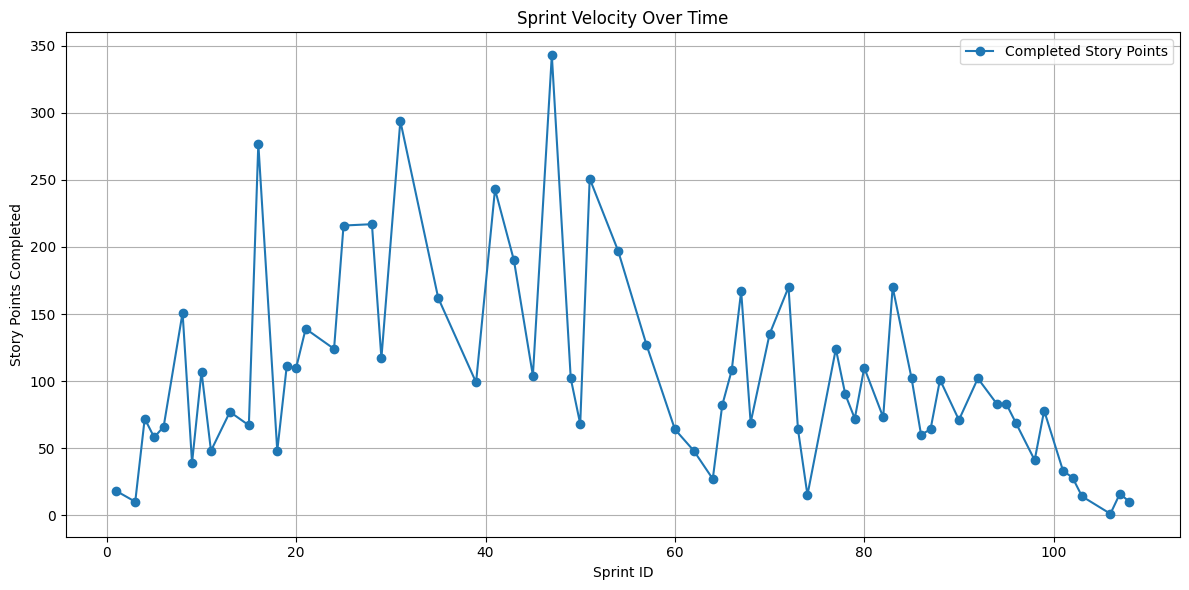

In [24]:
# Convert sprintStartDate to datetime
sprints['sprintStartDate'] = pd.to_datetime(sprints['sprintStartDate'], errors='coerce')
sprints['sprintEndDate'] = pd.to_datetime(sprints['sprintEndDate'], errors='coerce')

# Plot completed story points per sprint (velocity)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(sprints['sprintId'], sprints['completedIssuesEstimateSum'], marker='o', label='Completed Story Points')
plt.title('Sprint Velocity Over Time')
plt.xlabel('Sprint ID')
plt.ylabel('Story Points Completed')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**STEP 6: Team Size vs Velocity**

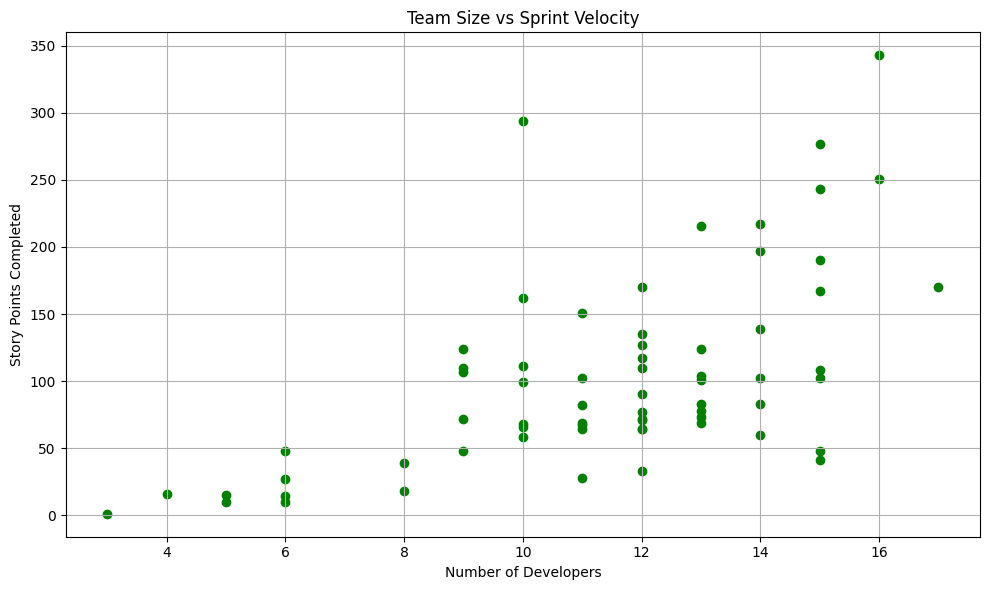

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(sprints['NoOfDevelopers'], sprints['completedIssuesEstimateSum'], c='green')
plt.title('Team Size vs Sprint Velocity')
plt.xlabel('Number of Developers')
plt.ylabel('Story Points Completed')
plt.grid(True)
plt.tight_layout()
plt.show()


**STEP 7: Identify Bottleneck Sprints (drop in performance)**

In [26]:
# Find sprints with very low velocity
low_velocity = sprints[sprints['completedIssuesEstimateSum'] < 20]
low_velocity[['sprintId', 'sprintName', 'completedIssuesEstimateSum', 'NoOfDevelopers']]


,sprintId,sprintName,completedIssuesEstimateSum,NoOfDevelopers
0,1,Sprint 1,18.0,8
1,3,Sprint 2,10.0,6
42,74,Sprint 43,15.0,5
62,103,Sprint 63,14.0,6
63,106,Sprint 64,1.0,3
64,107,Sprint 67,16.0,4
65,108,Sprint 68,10.0,5


**Step 8: Check if blocked_issues is empty**

In [27]:
print("Total Blocked Issues Found:", blocked_issues.shape[0])
blocked_issues.head()


Total Blocked Issues Found: 0


,key,issueType,sprint,status,summary,description,storyPoint,priority,watchcount,fixVersions,...,creator,reporter,commentCount,votes,issueLinks,blockedBy,blocks,dependedOnBy,dependedOn,subtasks


**Step 9: Check Unique Values in blockedBy**

In [28]:
print("Unique values in 'blockedBy':", issues_clean['blockedBy'].unique())


Unique values in 'blockedBy': [0.]


In [29]:
# Top 5 performing sprints based on completed story points
top_sprints = sprints.sort_values(by='completedIssuesEstimateSum', ascending=False).head(5)
top_sprints[['sprintId', 'sprintName', 'completedIssuesEstimateSum', 'NoOfDevelopers']]


,sprintId,sprintName,completedIssuesEstimateSum,NoOfDevelopers
26,47,Sprint 27,343.0,16
20,31,Sprint 21,294.0,10
11,16,Sprint 12,277.0,15
29,51,Sprint 30,251.0,16
23,41,Sprint 24,243.0,15


from matplotlib import pyplot as plt
_df_0['sprintId'].plot(kind='hist', bins=20, title='sprintId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['completedIssuesEstimateSum'].plot(kind='hist', bins=20, title='completedIssuesEstimateSum')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['NoOfDevelopers'].plot(kind='hist', bins=20, title='NoOfDevelopers')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('sprintName').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='sprintId', y='completedIssuesEstimateSum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='completedIssuesEstimateSum', y='NoOfDevelopers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['sprintId'].plot(kind='line', figsize=(8, 4), title='sprintId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['completedIssuesEstimateSum'].plot(kind='line', figsize=(8, 4), title='completedIssuesEstimateSum')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['NoOfDevelopers'].plot(kind='line', figsize=(8, 4), title='NoOfDevelopers')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['sprintName'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='sprintId', y='sprintName', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['sprintName'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='completedIssuesEstimateSum', y='sprintName', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['sprintName'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='NoOfDevelopers', y='sprintName', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['sprintId'].plot(kind='hist', bins=20, title='sprintId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['completedIssuesEstimateSum'].plot(kind='hist', bins=20, title='completedIssuesEstimateSum')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['NoOfDevelopers'].plot(kind='hist', bins=20, title='NoOfDevelopers')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_16.groupby('sprintName').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='index', y='sprintId', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='sprintId', y='completedIssuesEstimateSum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='completedIssuesEstimateSum', y='NoOfDevelopers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['sprintId'].plot(kind='line', figsize=(8, 4), title='sprintId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['completedIssuesEstimateSum'].plot(kind='line', figsize=(8, 4), title='completedIssuesEstimateSum')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['NoOfDevelopers'].plot(kind='line', figsize=(8, 4), title='NoOfDevelopers')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['sprintName'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='index', y='sprintName', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['sprintName'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='sprintId', y='sprintName', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['sprintName'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='completedIssuesEstimateSum', y='sprintName', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['sprintName'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='NoOfDevelopers', y='sprintName', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)